# Final Assessment Scratch Pad


## Instructions


1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.


## Report


##### Overview

Use LinearRegression() to find the values

##### 1. Descriptive Analysis

Run pd.info() to check data types, so it can be determined if there is any need to lower precision to reduce memory and time overhead

Run pd.hist() on the tabular to see roughly the distribution of every (numerical) feature. It appears like some features are heavily skewed (eg V0, V3) while others are more equally distributed (eg V56, V57, V59). Lastly, distribution of y-value (target) is not heavily skewed, so oversampling or undersampling is not required.

Plot the distribution of categorical data to see distribution. Some are mostly only only 1 datatype eg V47, so it can be dropped later

Check for numeric and categorical data using pd.select_dtypes(), so preprocessing of categorical or numerical data can be hardcoded in the model to reduce overhead. Use include=["number"] and exclude=["number"] in case there are strange dtypes for categorical.variables. Appears

pd.describe() to check mean, median, mode,  of values, for both numerical and categorical data <br>
Categorical data has some which are have only a few unique values eg V9, while others have many eg V12, which may require different handling eg using sparse=True to handle sparse matrices  <br>
Numeric data has features at different magnitudes hence scaling is required later.<br>



##### 2. Detection and Handling of Missing Values

Some features have more NaN than others. V39, V38, V15, V5 are around 50% NaN, so high chance they will not be useful in the actual model. 

Also every row seems to have some NaN values, so pd.dropna is a bad idea. Imputeing values to replace NaN will be better.

Out of ~60 features, some rows have a lot of NaN values eg index 18371 is 25% NaN

na can be dropped after 


##### 3. Detection and Handling of Outliers


IQR visualisation suggests target value mostly concentrated around 150 with some outliers (5347, or about 1%)

Use IQR to determine outliers.

Z score generates similar %, so arbitrarily pick IQR

##### 4. Detection and Handling of Class Imbalance

Target value does not seem very imbalanced after data cleaning. Nothing done at this stage.

##### 5. Understanding Relationship Between Variables

Use pd.corr() to determine colinearity and get the respective features. 1 of each feature are not dropped because empirically, works well enough without dropping. 

##### 6. Data Visualization

Run pd.hist(), IQR on TARGET, and categorical value distributions to see if further cleaning required. Does not seem to have any major issues


##### 7. General Preprocessing

Use one hot encoding to process categorical variables to something workable. Empirically, the categorical values are nominal (unranked) not ordinal (ranked) so OrdinalEncoding resulted in terrible MSE. Numerical data needs scaling due to difference in magnitude.

##### 8. Feature Selection

Dropped features that are mostly NaN, dropped categorical features that are only 1 variable

##### 9. Feature Engineering

Not done since empirically it works well on all the features.

##### 10. Creating Models


Train test split and 3-fold cross validation with mean, std is checked to see if model works and is not overfitting to a particular set of data. MSE locally is approximately 2700, with roughly the same value on Coursemology

##### 11. Model Evaluation


Tried using RandomForestClassifier as well, but achieved roughly the same MSE values on various hyperparameters of n_estimators and tree_depth.

In actual model, used SimpleImputer instead of dropna since it did not seem to affect the MSE significantly

Using only tabular data is sufficient to get a good MSE hence image data not considered, especially since running different modality on Linear Regression is not ideal. Training on multimodal data is likely to require much more complicated models that exceed time and memory allowed.

##### 12. Hyperparameters Search

Not done

##### Conclusion

Linear Regression works well on the dataset, suggesting the data is linearly related to the target



---


# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done.


## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).


In [2]:
%%time
import pandas as pd
import os
import numpy as np
from util import show_images, dict_train_test_split

CPU times: total: 1.08 s
Wall time: 1.45 s


## Load Dataset

The dataset provided is multimodal and contains two components, images and tabular data. The tabular dataset `tabular.csv` contains $N$ entries and $F$ columns, including the target feature. On the other hand, the image dataset `images.npy` is of size $(N, H, W)$, where $N$, $H$, and $W$ correspond to the number of data, image width, and image height, respectively. Each image corresponds to the data in the same index of the tabular dataset. These datasets can be found in the `data/` folder in the given file structure.

A code snippet that loads and displays some of the data is provided below.

### Load Tabular Data


In [3]:
tabular = pd.read_csv(os.path.join('data', 'tabular.csv'))
tabular

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,target
0,8315.0,1784.0,21994.0,37115.0,317.0,105.016815,296559.0,321602.0,2470.0,C1,...,C4,C4,834148.0,C2,C6,1089,293,C2,7428.249334,300.0
1,8315.0,1272.0,11114.0,18683.0,230.0,NaN,340059.0,368602.0,2820.0,C0,...,C7,C7,401668.0,C5,C6,9801,1085,C7,9693.829502,200.0
2,8315.0,3832.0,65514.0,147707.0,607.0,105.018240,279159.0,302802.0,2330.0,C1,...,C7,C7,820948.0,C5,C4,1485,304,C6,7609.258214,50.0
3,8315.0,2296.0,32874.0,55547.0,404.0,NaN,313959.0,340402.0,2610.0,C1,...,C7,C7,1664548.0,C5,C5,-495,711,C4,4258.532609,140.0
4,11021.0,1784.0,21994.0,37115.0,375.0,105.024985,232701.0,252606.0,1490.0,C0,...,C7,C7,735748.0,C2,C9,1683,117,C0,9492.484802,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357694,8315.0,1272.0,11114.0,18683.0,230.0,105.012445,270459.0,293402.0,2260.0,C0,...,C2,C2,25708.0,NaN,C4,6336,1855,C2,4634.276235,30.0
357695,8315.0,2296.0,32874.0,55547.0,404.0,NaN,244359.0,265202.0,2050.0,C0,...,C7,C7,820948.0,C5,C9,2970,854,C8,8379.073980,190.0
357696,8315.0,1784.0,21994.0,37115.0,375.0,NaN,348759.0,378002.0,2890.0,C0,...,C7,C7,1212748.0,C5,C9,-4257,942,C8,5359.986193,140.0
357697,8315.0,1784.0,21994.0,37115.0,375.0,105.016815,348759.0,378002.0,2890.0,C0,...,C7,C7,1664548.0,C5,C8,2376,1195,C7,9095.239127,180.0


### Load Image Data


Shape: (357699, 8, 8)


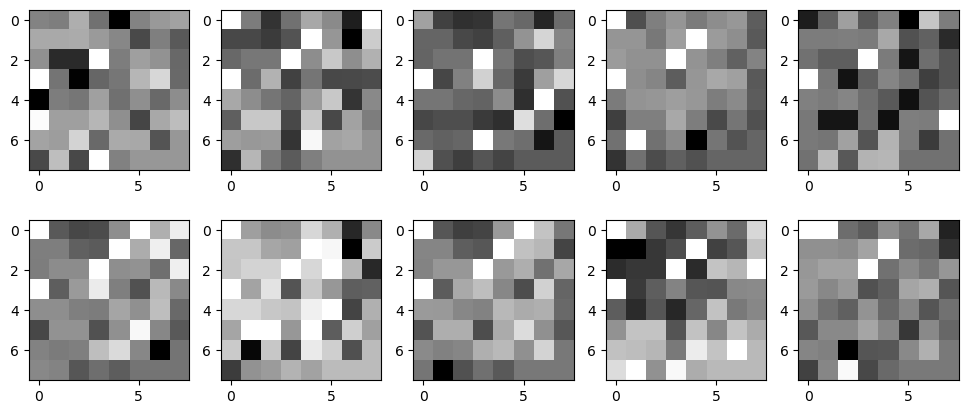

In [4]:
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
print('Shape:', images.shape)
show_images(images[:10], n_row=2, n_col=5, figsize=[12,5])

## Data Exploration & Preparation


### 1. Descriptive Analysis


In [5]:
tabular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357699 entries, 0 to 357698
Data columns (total 61 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V0      357699 non-null  float64
 1   V1      357699 non-null  float64
 2   V2      357699 non-null  float64
 3   V3      357699 non-null  float64
 4   V4      353686 non-null  float64
 5   V5      185394 non-null  float64
 6   V6      357699 non-null  float64
 7   V7      357699 non-null  float64
 8   V8      357699 non-null  float64
 9   V9      357699 non-null  object 
 10  V10     357699 non-null  float64
 11  V11     357699 non-null  float64
 12  V12     357699 non-null  object 
 13  V13     357699 non-null  float64
 14  V14     357699 non-null  float64
 15  V15     166590 non-null  float64
 16  V16     357699 non-null  float64
 17  V17     357699 non-null  float64
 18  V18     357699 non-null  float64
 19  V19     357699 non-null  object 
 20  V20     357699 non-null  object 
 21  V21     35

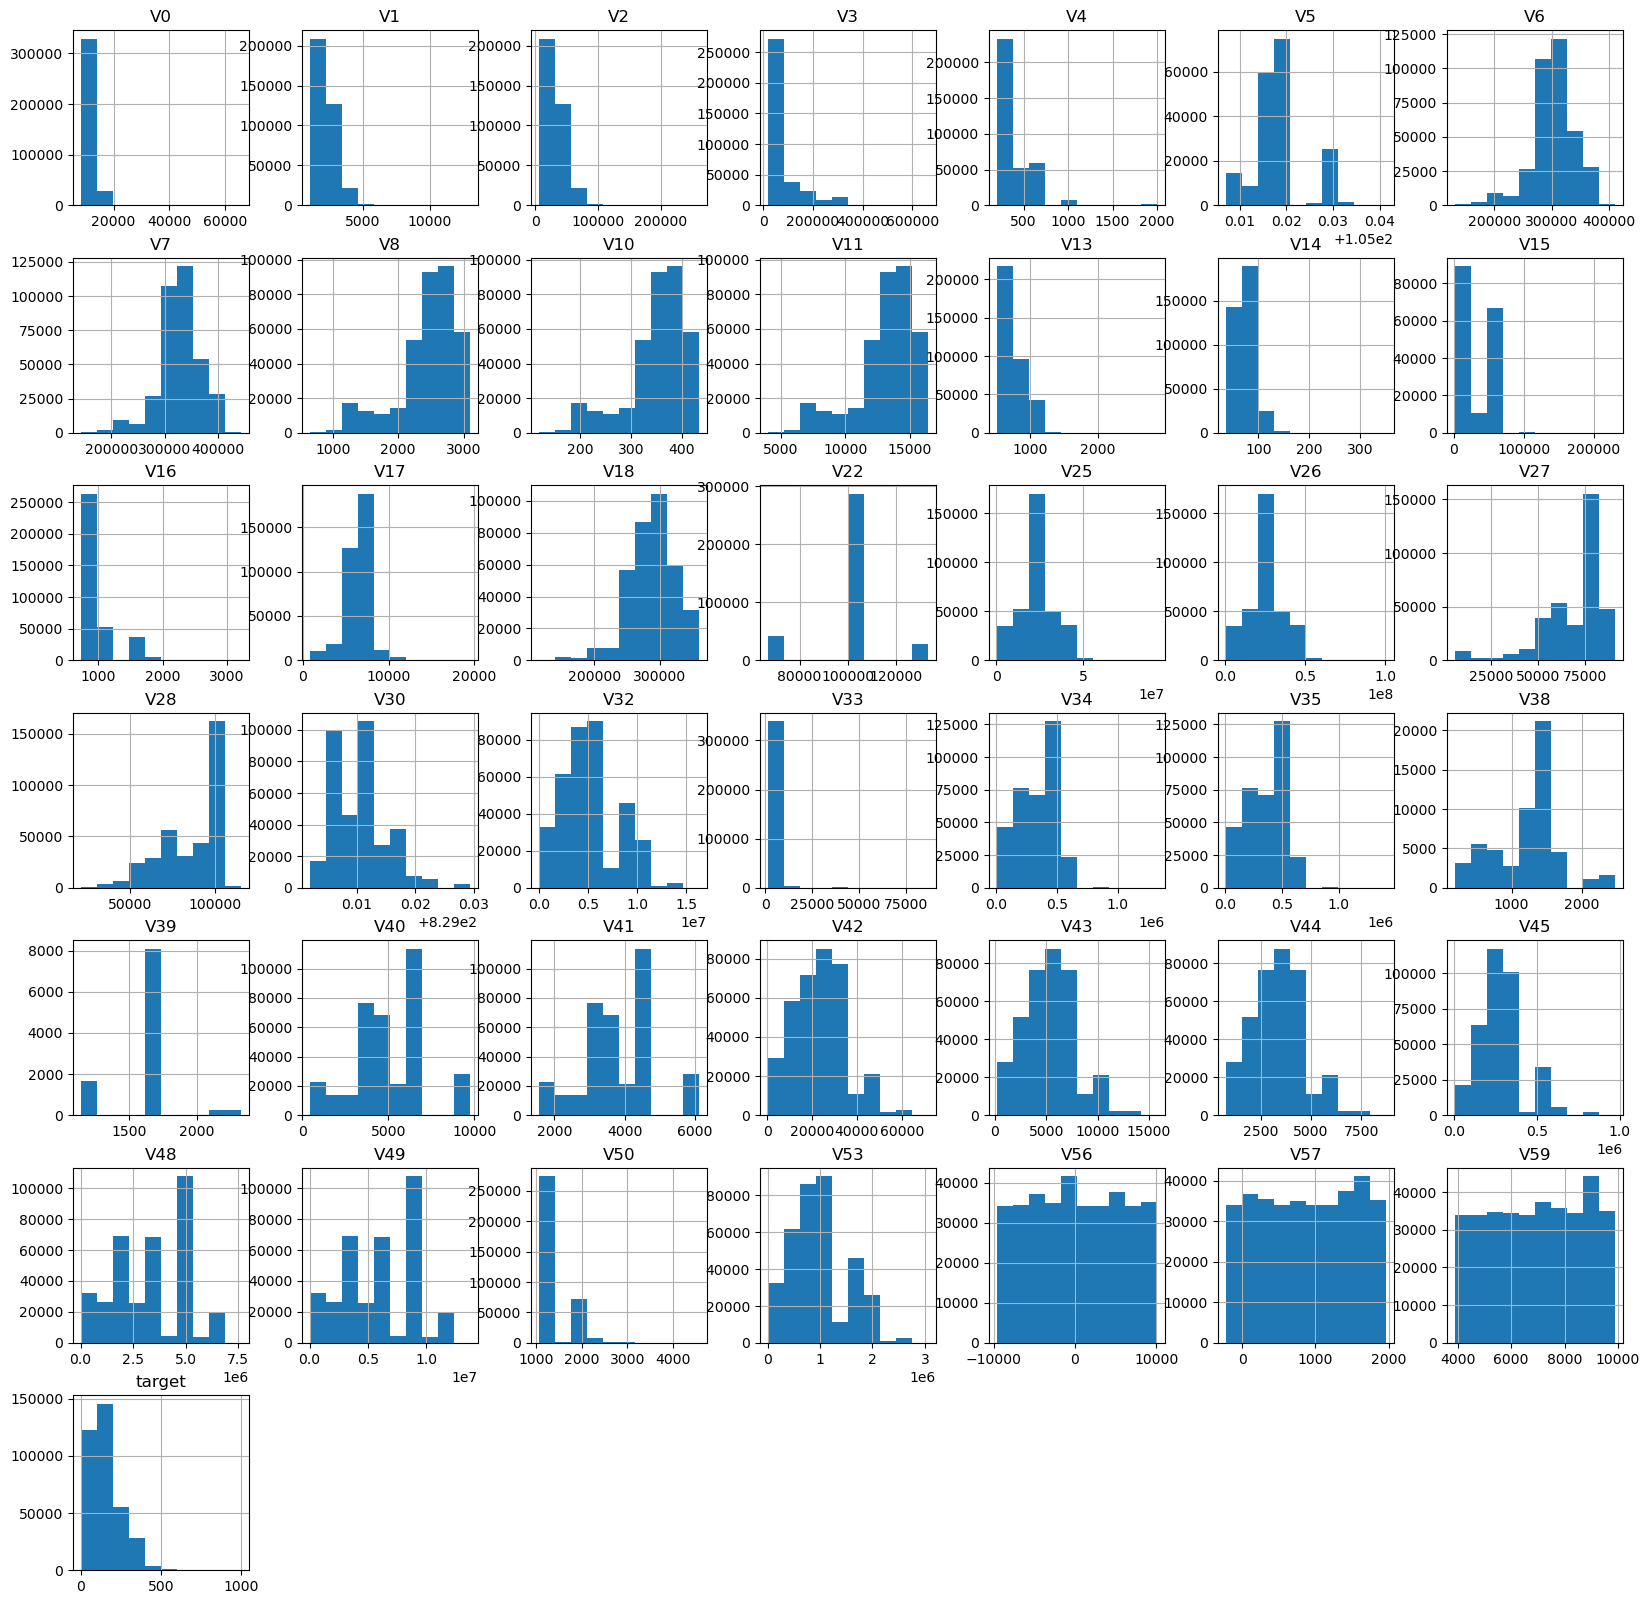

In [6]:
from matplotlib import pyplot as plt
tabular.hist(figsize=(20,20))
plt.show()

In [7]:
print("====Categorical Stats====")
# assume categorical data is not numeric, assume only nominal data (i.e. no ordinal data which can be ranked)
non_numeric_data = tabular.select_dtypes(exclude=["number"])
non_numeric_cols = non_numeric_data.columns
print(non_numeric_cols)
non_numeric_data.describe()

# V0 to V59 are features
# 'target' is the label


====Categorical Stats====
Index(['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V47', 'V51', 'V52', 'V54', 'V55', 'V58'],
      dtype='object')


,V9,V12,V19,V20,V21,V23,V24,V29,V31,V36,V37,V46,V47,V51,V52,V54,V55,V58
count,357699,357699,357699,357699,357699,357699,357699,357699,357699,345393,357699,357561,357699,357696,357696,348489,357699,357699
unique,2,349,2,2,30,4,28,17,8,8,431,5,7,9,9,6,10,10
top,C1,C256,C1,C1,C9,C2,C18,C13,C4,C3,C303,C2,C6,C7,C7,C5,C2,C4
freq,199239,27872,337985,337985,89230,177134,205317,323438,330406,206591,55915,298840,341578,271129,271129,279340,44469,44161


In [8]:
print("====Describe====")
summary_stats = tabular.describe() # use include='all' to include non-numeric columns
modes = tabular.mode().iloc[0]
summary_stats.loc['mode'] = modes
# mode_percentage = (modes / df.shape[0]) * 100
# summary_stats.loc['mode_percentage'] = mode_percentage
# NOTE!!! summary stats only works for numeric columns
summary_stats


====Describe====


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,...,V44,V45,V48,V49,V50,V53,V56,V57,V59,target
count,357699.000000,357699.000000,357699.000000,357699.000000,353686.000000,185394.000000,357699.000000,357699.000000,357699.000000,357699.000000,...,357699.000000,348481.000000,3.576990e+05,3.576990e+05,357699.000000,3.576990e+05,357699.000000,357699.000000,357699.000000,357699.000000
mean,8986.431953,2159.369906,29970.610502,71635.650894,422.814505,105.018453,304805.885367,330512.427868,2433.870349,348.354759,...,3475.469817,274526.343904,3.320163e+06,5.976137e+06,1451.348108,9.969380e+05,241.681347,886.584600,6961.593087,140.632062
std,2258.929297,677.948161,14406.398425,64147.302755,175.144851,0.005735,38150.074420,41219.620638,442.969798,56.953260,...,1368.563530,139035.148363,1.712909e+06,3.083237e+06,236.048772,5.528369e+05,5662.691122,635.856195,1737.129773,88.043009
min,8315.000000,1016.000000,5674.000000,18683.000000,201.000000,105.007030,131259.000000,143002.000000,650.000000,119.000000,...,772.000000,4318.000000,1.974400e+04,3.538300e+04,1065.000000,5.848000e+03,-9603.000000,-224.000000,3888.002265,0.000000
25%,8315.000000,1784.000000,21994.000000,37115.000000,317.000000,105.016815,287859.000000,312202.000000,2330.000000,335.000000,...,2722.000000,199266.000000,1.823569e+06,3.282268e+06,1303.000000,5.277880e+05,-4554.000000,326.000000,5457.818630,80.000000
50%,8315.000000,1784.000000,21994.000000,37115.000000,375.000000,105.018240,305259.000000,331002.000000,2540.000000,362.000000,...,3522.000000,263068.000000,3.691969e+06,6.645388e+06,1371.000000,8.341480e+05,0.000000,887.000000,6970.217698,120.000000
75%,8315.000000,2296.000000,32874.000000,73979.000000,491.000000,105.018240,322659.000000,349802.000000,2680.000000,380.000000,...,4322.000000,332068.000000,4.847119e+06,8.724658e+06,1371.000000,1.212748e+06,5247.000000,1448.000000,8505.729334,195.100000
max,65715.000000,13048.000000,261354.000000,663803.000000,1999.000000,105.041325,409659.000000,443802.000000,3100.000000,434.000000,...,8722.000000,971468.000000,7.646119e+06,1.376286e+07,4567.000000,3.059548e+06,10098.000000,1965.000000,9887.996293,1000.000000
mode,8315.000000,1784.000000,21994.000000,37115.000000,375.000000,105.018240,296559.000000,321602.000000,2470.000000,353.000000,...,2722.000000,332068.000000,3.691969e+06,6.645388e+06,1371.000000,8.209480e+05,-1683.000000,1591.000000,9092.558026,120.000000


In [9]:
# # Create subplots for each categorical feature
# fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))
# axes = axes.flatten()
# for i, column in enumerate(non_numeric_cols):
#     value_counts = df[column].value_counts().sort_index()
#     positions = np.arange(len(value_counts))
#     axes[i].bar(positions, value_counts, color='skyblue', edgecolor='black')
#     axes[i].set_title(f'Distribution of {column}')
#     axes[i].set_xlabel('Category')
#     axes[i].set_ylabel('Count')
#     axes[i].set_xticks(positions)
#     axes[i].set_xticklabels(value_counts.index)

# plt.tight_layout()
# plt.show()

### 2. Detection and Handling of Missing Values


In [10]:
print("======Is dropna feasible=========")
df_dropped = tabular.dropna()
print("shape after dropna:", df_dropped.shape)
print("percent of rows with na:", (tabular.shape[0] - df_dropped.shape[0])/tabular.shape[0] * 100)

# Find columns with missing values
count_missing_per_col = tabular.isna().sum()
percent_missing_per_col = tabular.isna().mean() * 100
cols_with_nan = pd.DataFrame({'count': count_missing_per_col, 'percentage': percent_missing_per_col})
cols_with_nan = cols_with_nan[cols_with_nan['count'] > 0].sort_values(by='count', ascending=False)
print("====Columns with missing values:====")
print("Cols_with_nan shape:",cols_with_nan.shape)
cols_with_nan

======Is dropna feasible=========
shape after dropna: (0, 61)
percent of rows with na: 100.0
====Columns with missing values:====
Cols_with_nan shape: (19, 2)


,count,percentage
V39,347413,97.124398
V38,302903,84.680975
V15,191109,53.427323
V5,172305,48.170389
V35,12306,3.440323
V25,12306,3.440323
V26,12306,3.440323
V33,12306,3.440323
V34,12306,3.440323
V36,12306,3.440323


In [11]:
print("Rows with most NaN values:")

# Count the number of NaN values in each row
nan_count_per_row = tabular.isna().sum(axis=1)

df_check_nan = tabular.copy()

# Add a new column to the DataFrame with the count of NaN values per row
df_check_nan['nan_count'] = nan_count_per_row

# Calculate the percentage of NaN values
df_check_nan['nan_percent'] = (nan_count_per_row / len(tabular.columns)) * 100

# Create a DataFrame with count and percent of missing values
rows_w_missing_data = pd.DataFrame({
    'count': nan_count_per_row,
    'percent': df_check_nan['nan_percent']
})

missing_data_sorted = rows_w_missing_data.sort_values(by=['count'], ascending=False)
missing_data_sorted



Rows with most NaN values:


,count,percent
18371,15,24.590164
44844,15,24.590164
136833,15,24.590164
283507,15,24.590164
105353,15,24.590164
...,...,...
50926,1,1.639344
50924,1,1.639344
203459,1,1.639344
332418,1,1.639344


In [12]:
# Handle missing values
# drop >50% missing values
tabular.drop(columns=['V39','V38', 'V15', 'V5'], inplace=True)
print("shape before dropna:", tabular.shape)
print("shape after dropna:", tabular.dropna().shape) #note can also do fillna
# note: from mock final, probably better to just input median/mode


shape before dropna: (357699, 57)
shape after dropna: (333915, 57)


In [13]:
# drop rows with missing values and corresponding images
indices_to_drop = tabular[tabular.isnull().any(axis=1)].index
pre_drop_tabular = tabular.shape
pre_drop_images = images.shape
tabular.drop(indices_to_drop, inplace=True)
images = np.delete(images, indices_to_drop, axis=0)
print("shape after dropna:", tabular.shape)
print("shape after dropna:", images.shape)
print("% dropped:", pre_drop_tabular[0]/tabular.shape[0] * 100)


shape after dropna: (333915, 57)
shape after dropna: (333915, 8, 8)


### 3. Detection and Handling of Outliers


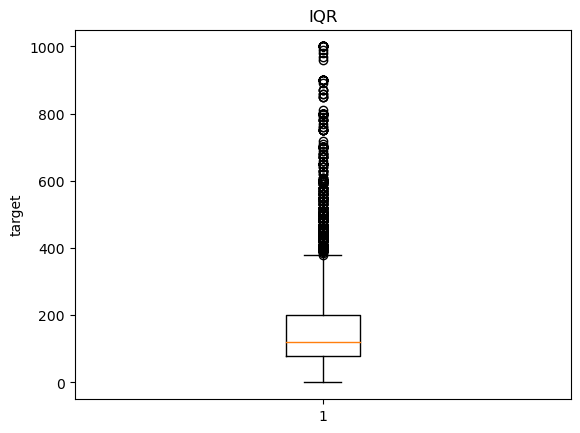

df shape: (333915, 57)
outliers shape: (5347, 57)
% outliers: 1.6013057215159547


In [14]:
# https://towardsdatascience.com/outlier-detection-part1-821d714524c


TARGET = 'target'

# Calculate the IQR
Q1, Q3 = tabular[TARGET].quantile([0.25,0.75])
IQR = Q3 - Q1

# Plot the IQR
plt.boxplot(tabular[TARGET])
plt.title('IQR')
plt.ylabel(TARGET)
plt.show()

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identify outliers
tabular.reset_index(drop=True, inplace=True)
outliers = tabular[(tabular[TARGET] < lower_bound) | (tabular[TARGET] > upper_bound)]

tabular.reset_index(drop=True, inplace=True)
print("df shape:", tabular.shape)
print("outliers shape:", outliers.shape)
print("% outliers:", outliers.shape[0]/tabular.shape[0] * 100)

# drop outliers
indices_to_drop = outliers.index
tabular.drop(indices_to_drop, inplace=True)
images = np.delete(images, indices_to_drop, axis=0)


In [ ]:
y = tabular[TARGET]
z_scores_y = (y - y.mean()) / y.std()
threshold = 3
outliers_y = (z_scores_y > threshold) | (z_scores_y < -threshold)
num_outliers_y = outliers_y.sum()
percent_outliers_y = (num_outliers_y / y.size) * 100
num_outliers_y, percent_outliers_y

### 4. Detection and Handling of Class Imbalance


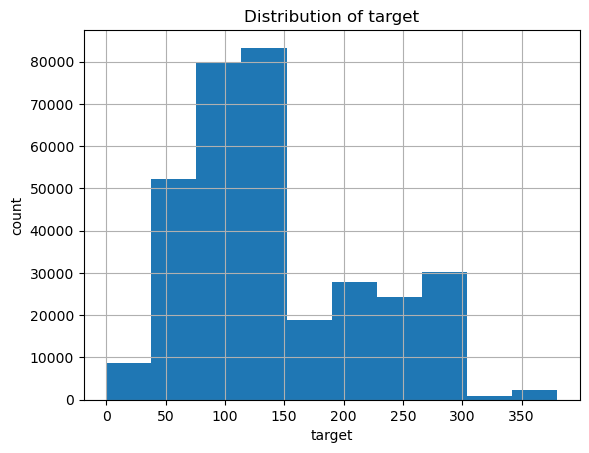

In [15]:
tabular["target"].hist()
plt.title('Distribution of target')
plt.xlabel('target')
plt.ylabel('count')
plt.show()

In [16]:
# i think no need to do anything

### 5. Understanding Relationship Between Variables


              V0        V1        V2        V3        V4        V6        V7  \
V0           NaN -0.046098 -0.046098  0.776476 -0.092065  0.096531  0.096531   
V1     -0.046098       NaN  1.000000  0.540202  0.805787 -0.109901 -0.109901   
V2     -0.046098  1.000000       NaN  0.540202  0.805787 -0.109901 -0.109901   
V3      0.776476  0.540202  0.540202       NaN  0.377418  0.016004  0.016004   
V4     -0.092065  0.805787  0.805787  0.377418       NaN  0.034774  0.034774   
V6      0.096531 -0.109901 -0.109901  0.016004  0.034774       NaN  1.000000   
V7      0.096531 -0.109901 -0.109901  0.016004  0.034774  1.000000       NaN   
V8     -0.768779 -0.034454 -0.034454 -0.636785  0.099745  0.557732  0.557732   
V10    -0.768779 -0.034454 -0.034454 -0.636785  0.099745  0.557732  0.557732   
V11    -0.768779 -0.034454 -0.034454 -0.636785  0.099745  0.557732  0.557732   
V13     0.319058  0.835193  0.835193  0.752703  0.670666 -0.029579 -0.029579   
V14    -0.092505  0.823236  0.823236  0.

(array([ 1,  2,  5,  6,  7,  8,  8,  9, 23, 24, 31, 32], dtype=int64),
 array([ 2,  1,  6,  5,  8,  7,  9,  8, 24, 23, 32, 31], dtype=int64))

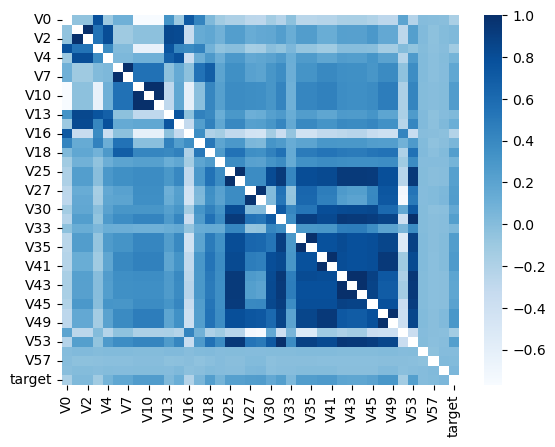

In [37]:
import seaborn as sns
corr_matrix = tabular.corr()
np.fill_diagonal(corr_matrix.values, np.nan)
sns.heatmap(corr_matrix, annot=False, cmap='Blues', fmt='g')
print(corr_matrix)
np.where(corr_matrix >= 1)

In [39]:
# Get indices where correlation is 1
indices = np.where(corr_matrix >= 1)

# Get column names
col_names = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*indices) if x != y and x < y]

print(col_names)

[('V1', 'V2'), ('V6', 'V7'), ('V8', 'V10'), ('V10', 'V11'), ('V34', 'V35'), ('V48', 'V49')]


### 6. Data Visualization


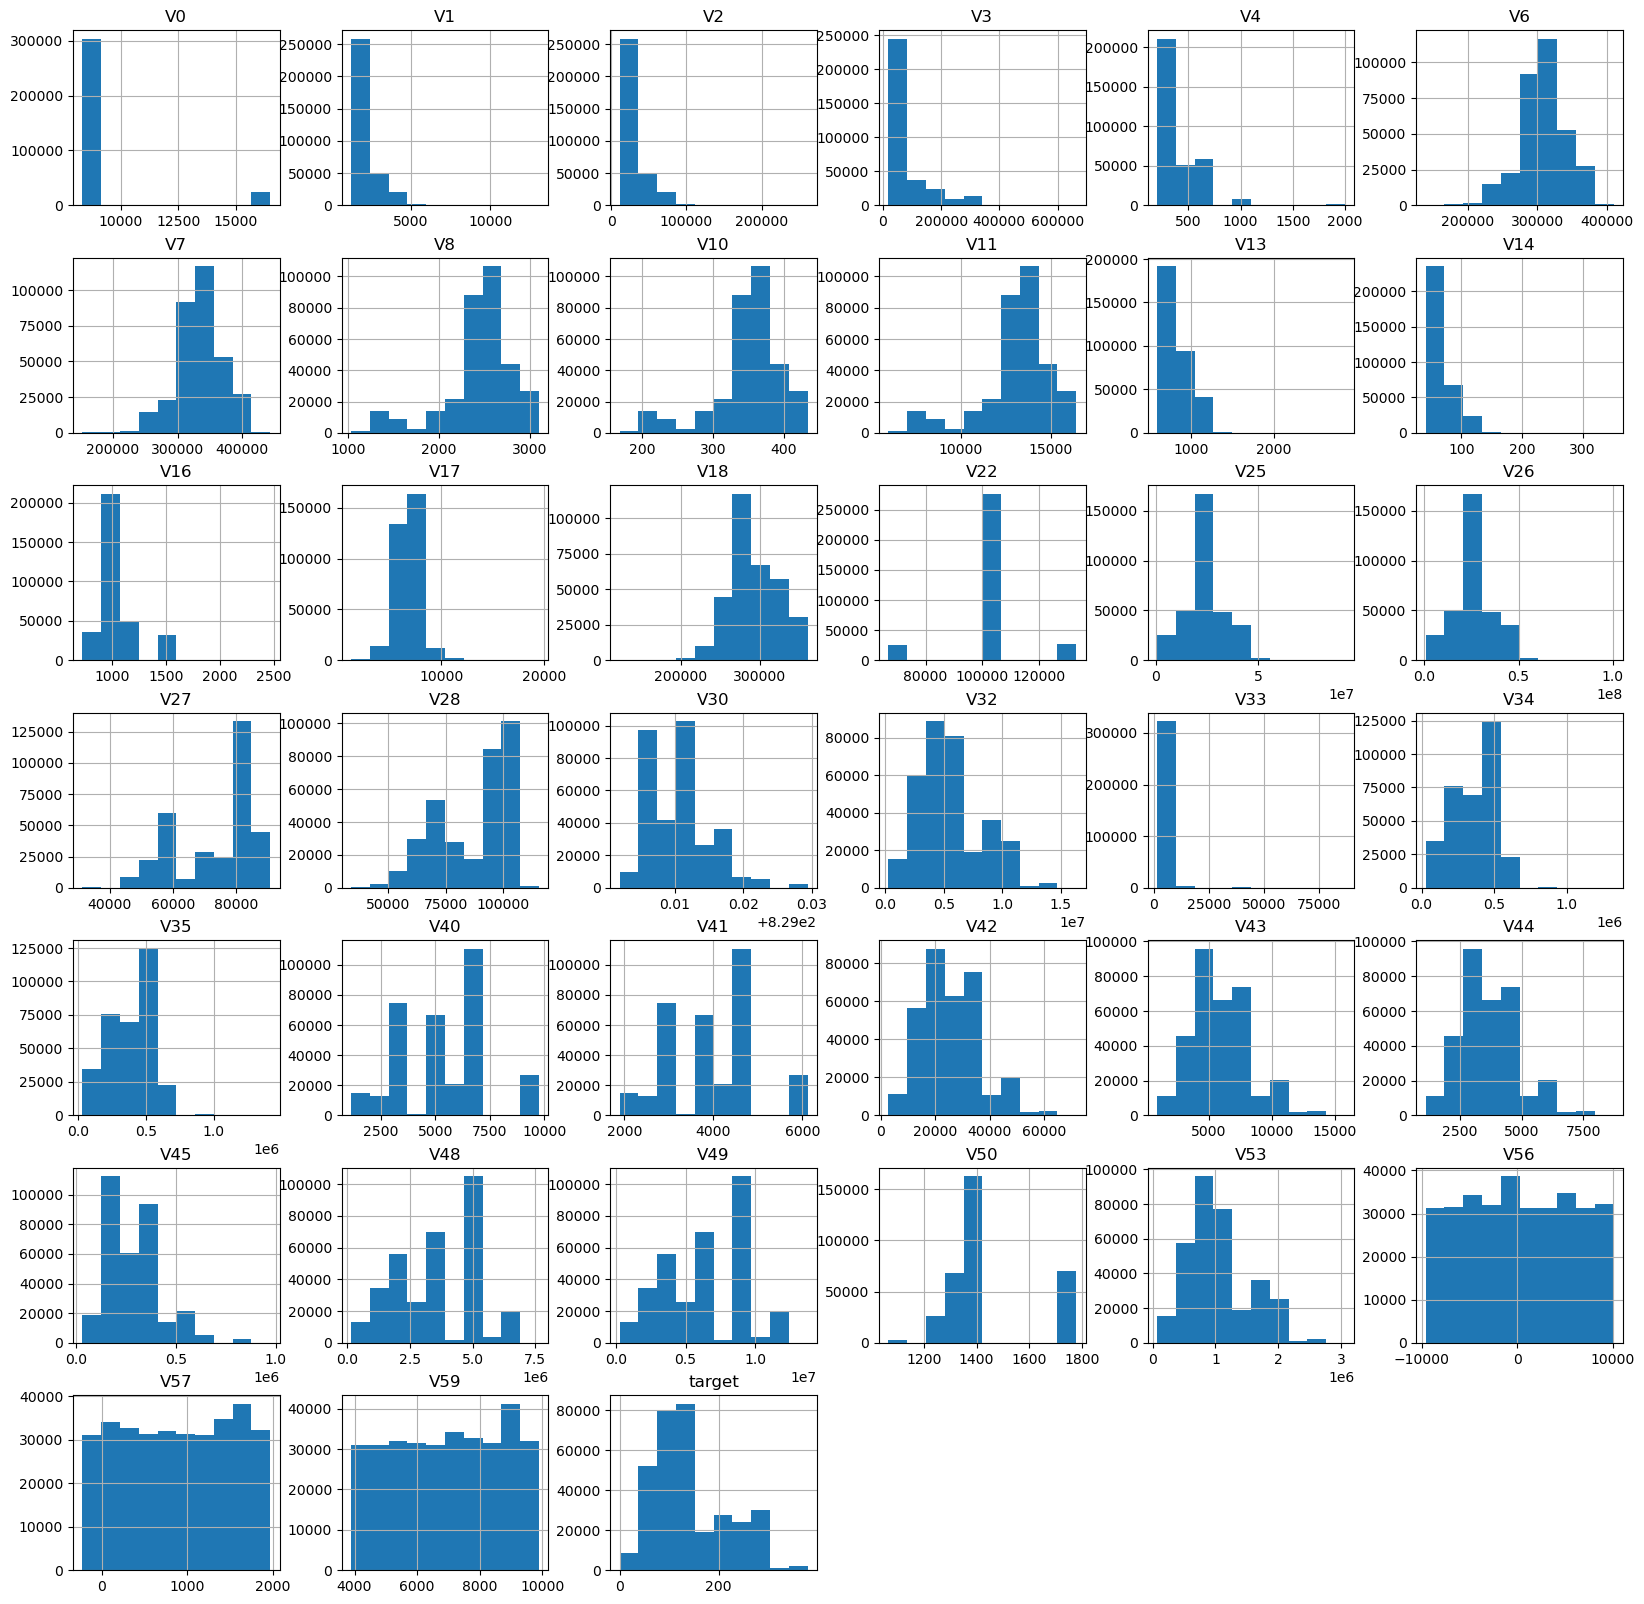

In [19]:
# Plot numerical
tabular.hist(figsize=(20,20))
plt.show()

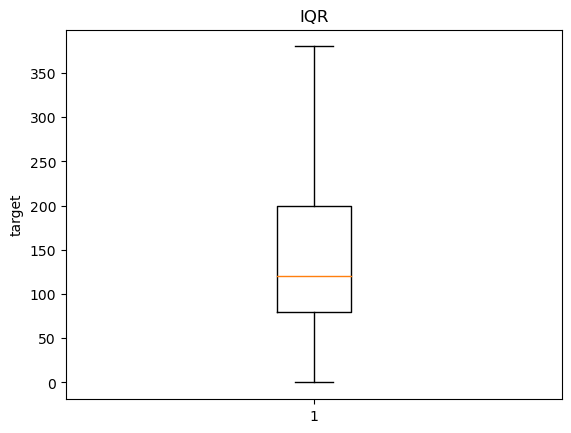

In [20]:
# Plot target
plt.boxplot(tabular[TARGET])
plt.title('IQR')
plt.ylabel(TARGET)
plt.show()

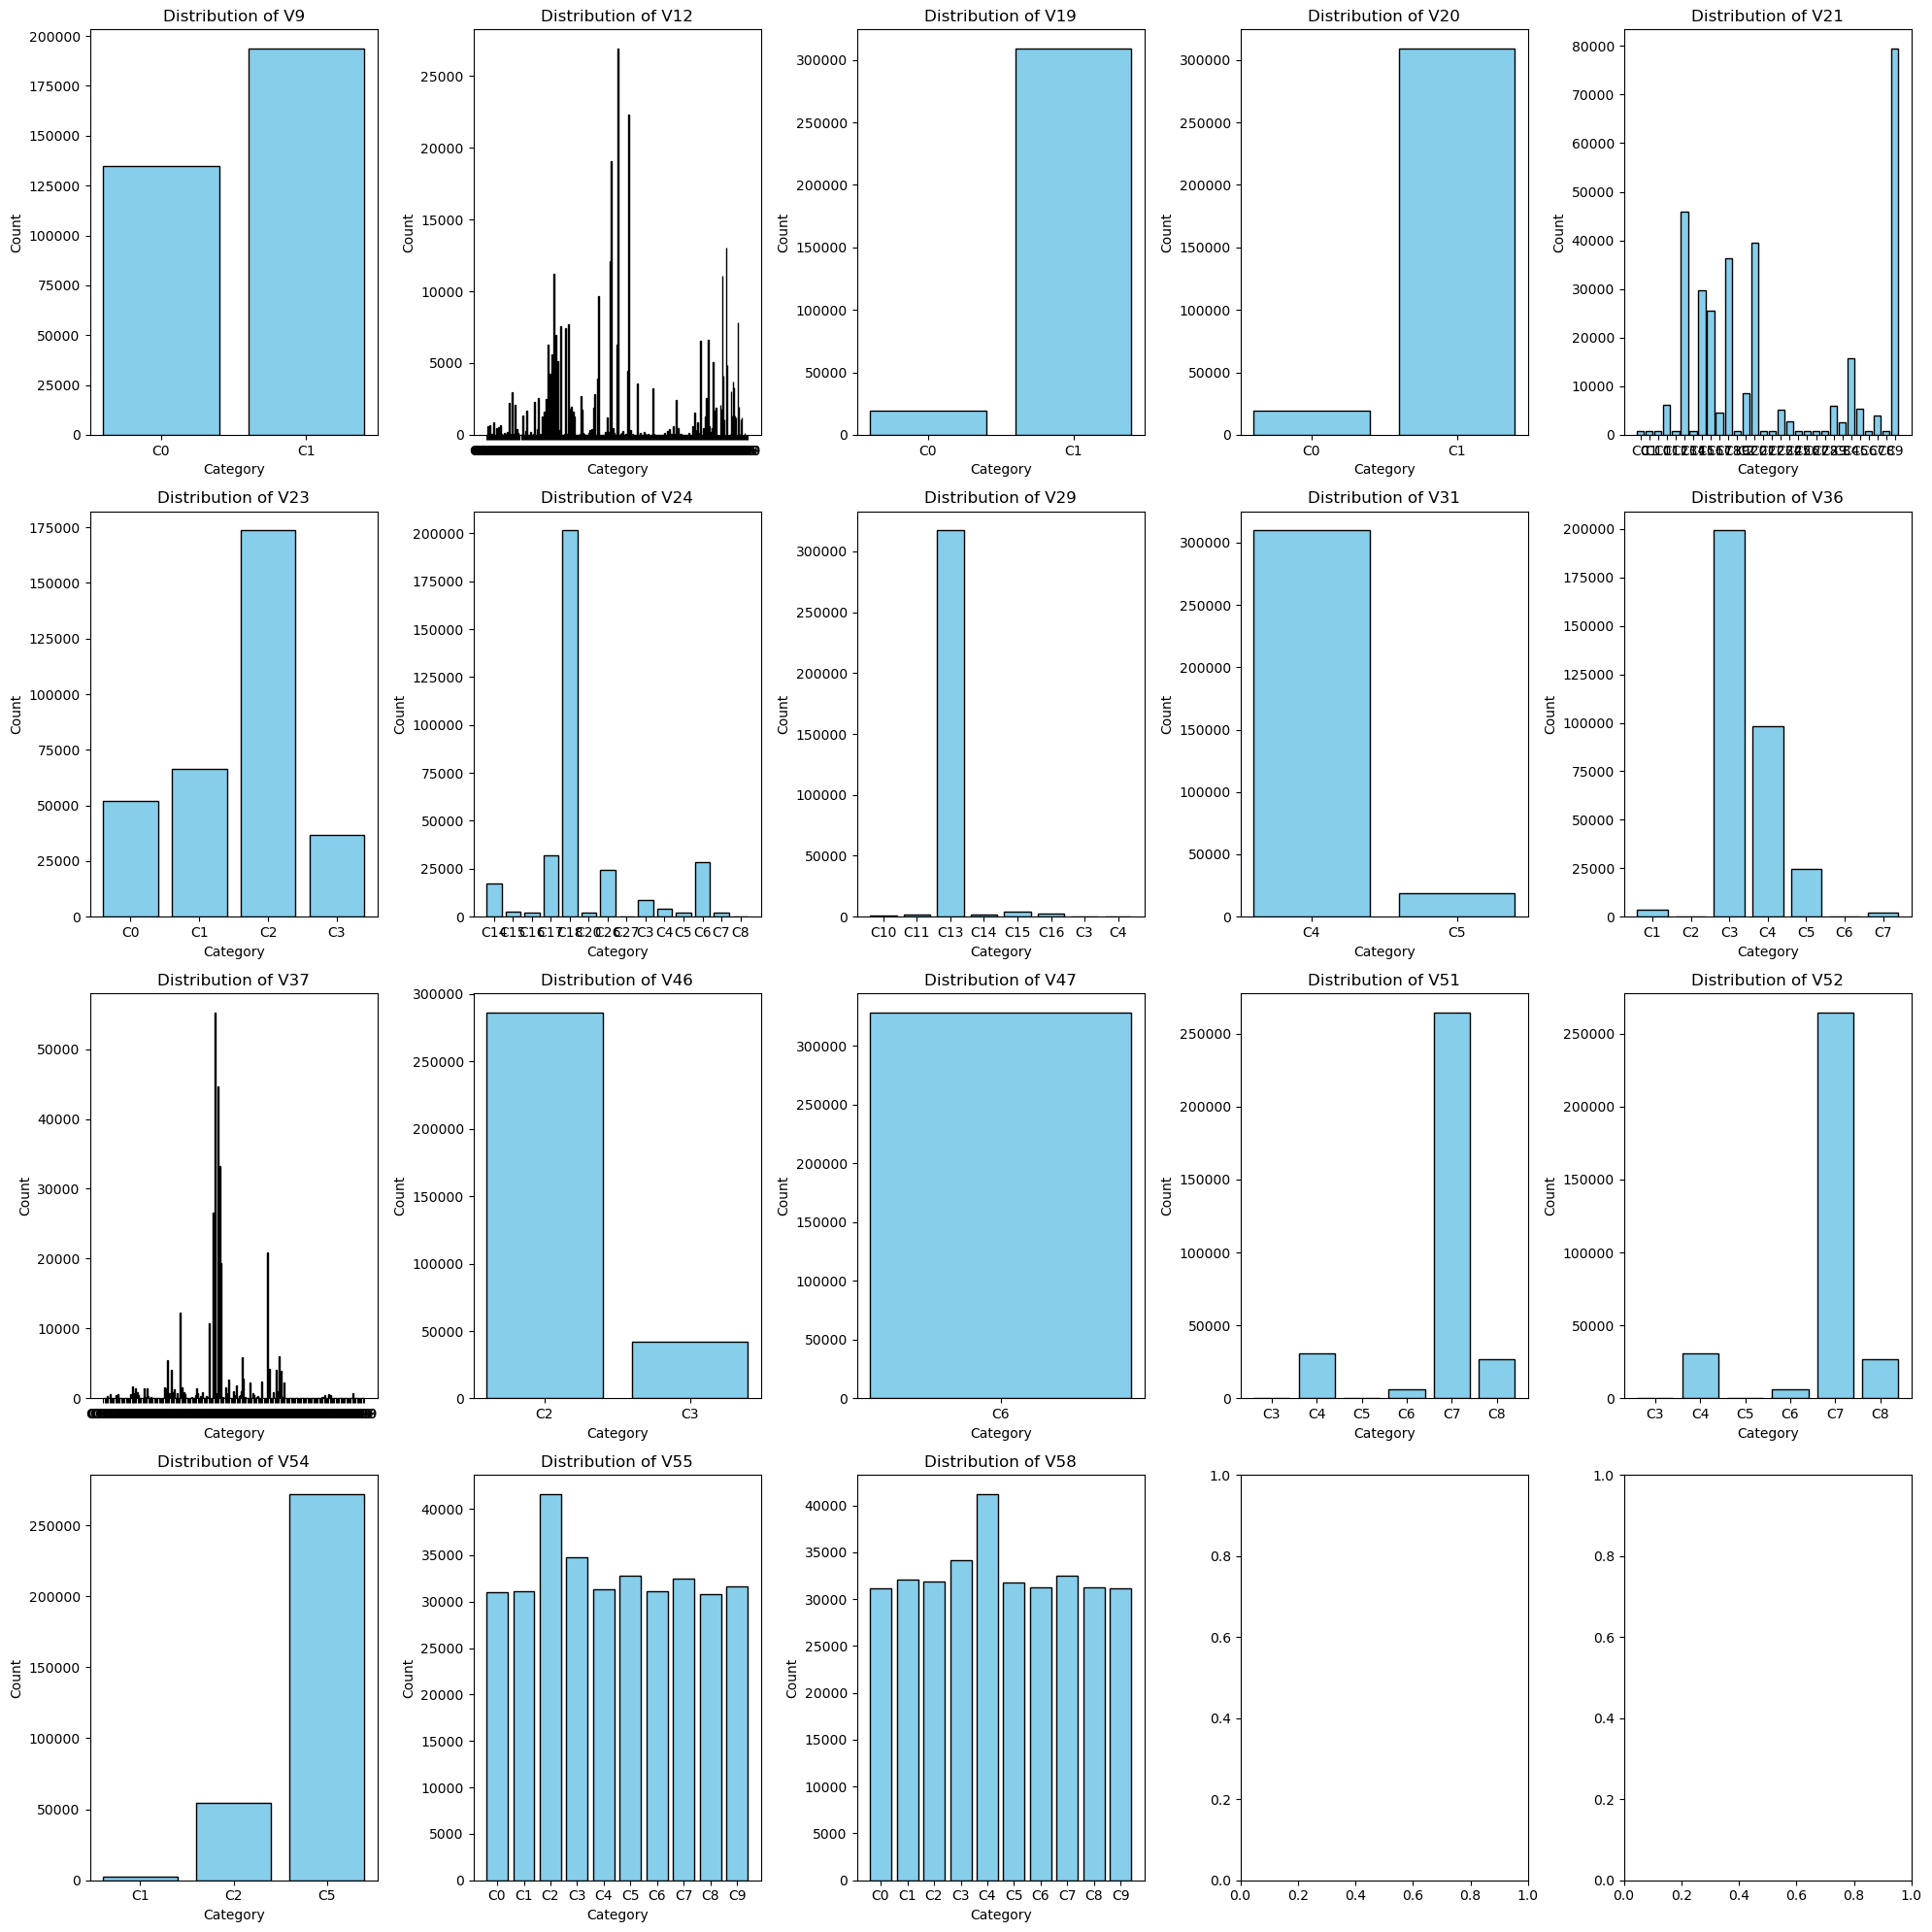

In [21]:
# Plot categorical
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 20))
axes = axes.flatten()
for i, column in enumerate(non_numeric_cols):
    value_counts = tabular[column].value_counts().sort_index()
    positions = np.arange(len(value_counts))
    axes[i].bar(positions, value_counts, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Category')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(positions)
    axes[i].set_xticklabels(value_counts.index)

plt.tight_layout()
plt.show()

## Data Preprocessing


### 7. General Preprocessing


In [22]:
# Then do one hot encoding of categorical data, ordinal encoding of categorical with too many features
# scaling of numerical data


In [23]:
# V47 has only 1 data type
tabular.drop(columns=['V47'], inplace=True)


In [24]:
from sklearn.model_selection import train_test_split

# Train test split
tabular.reset_index(drop=True, inplace=True)
df_X = tabular[tabular.columns.difference([TARGET])]
df_y = tabular[TARGET]
X_tabular_train, X_test, y_train, y_test = train_test_split(df_X, df_y)
X_images_train, X_images_test = images[X_tabular_train.index], images[X_test.index]

In [25]:
categorical_features = tabular.select_dtypes(exclude="number").columns
numerical_features = tabular[tabular.columns.difference([TARGET])].select_dtypes(include="number").columns

print("categorical_features:", categorical_features)
print("numerical_features:", numerical_features)

categorical_features: Index(['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58'],
      dtype='object')
numerical_features: Index(['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
       'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
       'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
       'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8'],
      dtype='object')


In [26]:
from sklearn.preprocessing import StandardScaler
# Separate features based on the number of categories
large_cat_features = [col for col in categorical_features if tabular[col].nunique() > 10]
small_cat_features = [col for col in categorical_features if tabular[col].nunique() <= 10]

print(large_cat_features)
print(small_cat_features)



['V12', 'V21', 'V24', 'V37']
['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']


In [27]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

X_small_cat = X_tabular_train[small_cat_features]
ohe.fit(X_small_cat)

codes = ohe.transform(X_small_cat).toarray()
feature_names = ohe.get_feature_names(small_cat_features)

df2 = X_tabular_train.copy()
df2[large_cat_features] = df2[large_cat_features].apply(lambda x: pd.to_numeric(x.str.replace('C', '')))
df2
df2.drop(columns=small_cat_features, inplace=True)
df3 = pd.concat([df2, pd.DataFrame(codes, columns=feature_names)], axis=1)
df3


# pd.make_dummies seems to have problems where if test has columns that train doesn't have, then might error out

c:\Users\Ian\miniconda3\envs\cs2109s-2220-final\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,V0,V1,V10,V11,V12,V13,V14,V16,V17,V18,...,V58_C0,V58_C1,V58_C2,V58_C3,V58_C4,V58_C5,V58_C6,V58_C7,V58_C8,V58_C9
259711,8315.0,1784.0,425.0,16063.0,256.0,737.0,71.0,938.0,7126.0,324204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177350,16515.0,1912.0,209.0,7543.0,49.0,889.0,61.0,1478.0,7438.0,302604.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57153,8315.0,1272.0,344.0,12868.0,103.0,585.0,51.0,1478.0,5098.0,237804.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146993,8315.0,2296.0,380.0,14288.0,268.0,889.0,91.0,938.0,7438.0,338604.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
171902,8315.0,1784.0,362.0,13578.0,217.0,737.0,71.0,1178.0,6034.0,281004.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
246416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
246423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# X_encoded = pd.get_dummies(X_tabular_train, columns=small_cat_features, drop_first=True)
# X_encoded[large_cat_features] = X_encoded[large_cat_features].apply(lambda x: x.astype('category').cat.codes)


# scaler = StandardScaler()
# X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])
# print(X_encoded.shape)

In [29]:
X_images_train_reshaped = X_images_train.reshape(X_images_train.shape[0], -1)
np.nan_to_num(X_images_train_reshaped, copy=False)
X_images_train_reshaped.shape




(246426, 64)

In [30]:
# grouped_data_train = np.concatenate((df3, X_images_train_reshaped), axis=1)
# grouped_data_train.shape

### 8. Feature Selection


In [31]:
# PCA doesn't seem like a good idea for supervised data due to low explanability, according to the internet
# PCA must be done after splitting and after scaling

from sklearn import decomposition
pca = decomposition.PCA(n_components=10, svd_solver='full')
# pca.fit_transform(grouped_data_train)

numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
X_pca = pca.fit_transform(X_tabular_train[numerical_features])

In [ ]:
# cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
# print(cumulative_variance_ratio)

### 9. Feature Engineering


In [ ]:
# no domain knowledge
# remember to merge image with the tabular data

## Modeling & Evaluation


In [ ]:
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


### 10. Creating models


In [6]:
### COURSEMOLOGY RUN 2k ####
"""mse()
"Lower is better (lowest: 0)"
	
2656.57
	elapsed_time()
	"Time elapsed (seconds)"

65.37

memory_usage()
"Memory usage (MB) -- experimental, may not be accurate"
Show more

912.6
"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


def drop_outliers(tabular, y):
    Q1, Q3 = y.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (y > lower_bound) & (y < upper_bound)
    return tabular[condition], y[condition]

class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self, learning_rate=0.01):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.

        self.learning_rate = learning_rate

        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
                            'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']

        self.numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
            ]
        )
 
        self.cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=True)),
            ]
        )

        self.preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", self.numeric_transformer, self.numerical_features), 
                ("cat", self.cat_transformer, self.categorical_features)
            ] 
        )


        self.model = Pipeline(
            steps=[
                ("preprocessor", self.preprocessor),
                ("regressor", RandomForestRegressor(n_estimators=10, max_depth=10, random_state=2109))                
            ]
        )

    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']
        tabular = tabular.sample(frac=0.3, random_state=2109)
        # images = images[
        y = y[tabular.index]
        # tabular = tabular.reset_index(drop=True)
        # y = y.reset_index(drop=True)
        


        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)
        tabular, y = drop_outliers(tabular, y)

        self.model.fit(tabular, y)
        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        tabular = X_dict['tabular']
        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)

        return self.model.predict(tabular)



In [ ]:
### COURSEMOLOGY RUN 2k ####
"""mse()
"Lower is better (lowest: 0)"
	
2656.57
	elapsed_time()
	"Time elapsed (seconds)"

65.37

memory_usage()
"Memory usage (MB) -- experimental, may not be accurate"
Show more

912.6
"""

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


def drop_outliers(tabular, y):
    Q1, Q3 = y.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (y > lower_bound) & (y < upper_bound)
    return tabular[condition], y[condition]

class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self, learning_rate=0.01):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.

        self.learning_rate = learning_rate

        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
                            'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']

        self.numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
            ]
        )
 
        self.cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=True)),
            ]
        )

        self.preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", self.numeric_transformer, self.numerical_features), 
                ("cat", self.cat_transformer, self.categorical_features)
            ] 
        )


        self.model = Pipeline(
            steps=[
                ("preprocessor", self.preprocessor),
                ("regressor", LinearRegression())                
            ]
        )

        # self.model = LinearRegression()

    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']
        tabular = tabular.sample(frac=0.3, random_state=2109)
        # images = images[
        y = y[tabular.index]
        # tabular = tabular.reset_index(drop=True)
        # y = y.reset_index(drop=True)
        


        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)
        tabular, y = drop_outliers(tabular, y)

        self.model.fit(tabular, y)
        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        tabular = X_dict['tabular']
        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)

        return self.model.predict(tabular)



In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor


def drop_outliers(tabular, images, y):
    Q1, Q3 = y.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (y > lower_bound) & (y < upper_bound)
    return tabular[condition], images[condition], y[condition]

class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self, learning_rate=0.01):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.

        self.learning_rate = learning_rate

        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
                            'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']

        self.numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
            ]
        )
 
        # self.small_cat_transformer = Pipeline( 
        #     steps=[ 
        #         ("imputer", SimpleImputer(strategy="most_frequent")),
        #         ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=True)), 
        #     ] 
        # ) 

        # self.large_cat_transformer = Pipeline(
        #     steps=[
        #         ("imputer", SimpleImputer(strategy="most_frequent")),
        #         ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        #     ]
        # )

        self.cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=True)),
            ]
        )

        self.preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", self.numeric_transformer, self.numerical_features), 
                # ("small_cat", self.small_cat_transformer, self.small_cat_features), 
                # ("large_cat", self.large_cat_transformer, self.large_cat_features),
                ("cat", self.cat_transformer, self.categorical_features)
            ] 
        )


        self.model = Pipeline(
            steps=[
                ("preprocessor", self.preprocessor),
                # ("pca", decomposition.PCA(n_components=0.99, svd_solver='full')),
                # ("regressor", SGDRegressor(
                #     random_state=2109, 
                #     learning_rate='constant',
                #     eta0=self.learning_rate,
                #     )
                # )
                ("regressor", LinearRegression())
                # ("regressor", RandomForestRegressor(n_estimators=5, max_depth=3, random_state=0, min_samples_leaf=10))
                # ("regressor", ElasticNet(random_state=0))
                
            ]
        )

        # self.model = LinearRegression()

    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']

        # images = images.reshape(images.shape[0], -1)
        # images = np.nan_to_num(images)

        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)
        tabular, images, y = drop_outliers(tabular, images, y)

        self.model.fit(tabular, y)
        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        tabular = X_dict['tabular']
        tabular = tabular.drop(columns=self.nancolumns)
        tabular[self.numerical_features] = tabular[self.numerical_features].astype(np.float32)
        tabular[self.categorical_features] = tabular[self.categorical_features].astype(object)

        return self.model.predict(tabular)



In [ ]:
"""
mse()
"Lower is better (lowest: 0)"
	4641.8

elapsed_time()
	"Time elapsed (seconds)"
30.21

memory_usage()
"Memory usage (MB) -- experimental, may not be accurate"
	
1408.43
"""



import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# from sklearn import decomposition


class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
        # correlated_features = [('V1', 'V2'), ('V6', 'V7'), ('V8', 'V10'), ('V10', 'V11'), ('V34', 'V35'), ('V48', 'V49')]
        # self.correlated_features_to_drop = ['V6', 'V8', 'V48']

        # self.large_cat_features = ['V12', 'V21', 'V24', 'V37']
        # self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    

    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']

        # images = images.reshape(images.shape[0], -1)
        # images = np.nan_to_num(images)

        tabular = tabular.drop(columns=self.nancolumns)


        numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
            ]
        ) 
 
        small_cat_transformer = Pipeline( 
            steps=[ 
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore")), 
            ] 
        ) 

        large_cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
            ]
        )

        preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", numeric_transformer, self.numerical_features), 
                ("small_cat", small_cat_transformer, self.small_cat_features), 
                ("large_cat", large_cat_transformer, self.large_cat_features),
            ] 
        ) 

        self.model = Pipeline( 
            steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())] 
        ) 

        self.model.fit(tabular, y)

        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        return self.model.predict(X_dict['tabular'])
    



In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet, 
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition

class Model:  
    """
    This class represents an AI model.
    """

    def __init__(self):
        """
        Constructor for Model class.

        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
        
        # self.large_cat_features = ['V12', 'V21', 'V24', 'V37']
        # self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        

        Parameters

        ----------

        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.

        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']
        images = images.reshape(images.shape[0], -1)
        self.image_labels = list(range(images.shape[1]))
        image_df = pd.DataFrame(images, columns=self.image_labels)
        tabular = tabular.drop(columns=self.nancolumns)
        combined = pd.concat([tabular, image_df], axis=1)
        combined.dropna(inplace=True)
        y = y[combined.index]

        numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
                   ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        ) 

        small_cat_transformer = Pipeline( 
            steps=[ 
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore")), 
            ] 
        ) 
        large_cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
            ]
        )

        image_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
                ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        )
        # pca = decomposition.PCA(n_components=15, svd_solver='full')
        preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", numeric_transformer, self.numerical_features), 
                ("small_cat", small_cat_transformer, self.small_cat_features), 
                ("large_cat", large_cat_transformer, self.large_cat_features),
                ("image", image_transformer, self.image_labels)
            ] 
        ) 
        self.model = Pipeline( 
            steps=[
                ("preprocessor", preprocessor),
                # ("pca", pca),
                # ("regressor", LinearRegression())
                # ("regressor", ElasticNet(alpha=0.1, random_state=42))
                ("regressor", RandomForestRegressor(
                    random_state=42, n_estimators=2,
                    max_depth=2, min_samples_split=10, min_samples_leaf=5,
                    )
                )
            ]
        ) 
        self.model.fit(combined, y)
        return self

    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.

        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
        """

        # TODO: Replace the following code with your own prediction code.

        tabular = X_dict['tabular']
        images = X_dict['images']
        images = images.reshape(images.shape[0], -1)
        image_df = pd.DataFrame(images, columns=self.image_labels)
        tabular = tabular.drop(columns=self.nancolumns)
        tabular.reset_index(drop=True, inplace=True)
        image_df.reset_index(drop=True, inplace=True)

        combined = pd.concat([tabular, image_df], axis=1)
        # combined = tabular

        return self.model.predict(combined)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNetCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition

class Model:  
    """
    This class represents an AI model.
    """

    def __init__(self):
        """
        Constructor for Model class.

        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
        
        # self.large_cat_features = ['V12', 'V21', 'V24', 'V37']
        # self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        

        Parameters

        ----------

        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.

        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']
        images = images.reshape(images.shape[0], -1)
        image_labels = ['T' + str(i) for i in range(images.shape[1])]
        image_df = pd.DataFrame(images, columns=image_labels)
        tabular = tabular.drop(columns=self.nancolumns)
        tabular.reset_index(drop=True, inplace=True)
        image_df.reset_index(drop=True, inplace=True)
        
        # print(tabular.shape)
        # print(image_df.shape)
        combined = pd.concat([tabular, image_df], axis=1)
        # combined = tabular
        # print(self.numerical_features + self.categorical_features)
        combined = combined.dropna(subset=self.numerical_features + self.categorical_features)
        y = y[combined.index]
        numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
                   ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        ) 

        small_cat_transformer = Pipeline( 
            steps=[ 
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore")), 
            ] 
        ) 
        large_cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
            ]
        )

        image_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
                ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        )
        # pca = decomposition.PCA(n_components=15, svd_solver='full')
        preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", numeric_transformer, self.numerical_features), 
                ("small_cat", small_cat_transformer, self.small_cat_features), 
                ("large_cat", large_cat_transformer, self.large_cat_features),
                ("image", image_transformer, image_labels)
            ] 
        ) 
        self.model = Pipeline( 
            steps=[
                ("preprocessor", preprocessor),
                # ("pca", pca),
                # ("regressor", LinearRegression())
                # ("regressor", ElasticNet(alpha=0.1, random_state=42))
                ("regressor", RandomForestRegressor(
                    random_state=63, n_estimators=2,
                    max_depth=2, min_samples_split=10, min_samples_leaf=5,
                    )
                )
            ]
        ) 
        self.model.fit(combined, y)
        return self

    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.

        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
        """

        # TODO: Replace the following code with your own prediction code.

        tabular = X_dict['tabular']
        images = X_dict['images']
        images = images.reshape(images.shape[0], -1)
        image_labels = ['T' + str(i) for i in range(images.shape[1])]
        image_df = pd.DataFrame(images, columns=image_labels)
        tabular = tabular.drop(columns=self.nancolumns)
        tabular.reset_index(drop=True, inplace=True)
        image_df.reset_index(drop=True, inplace=True)

        combined = pd.concat([tabular, image_df], axis=1)
        # combined = tabular

        return self.model.predict(combined)

In [ ]:
# %%time
# %%memit

# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression 
# from sklearn.ensemble import RandomForestRegressor
# from sklearn import decomposition

# class Model:  
#     """
#     This class represents an AI model.
#     """
    
#     def __init__(self):
#         """
#         Constructor for Model class.
  
#         Parameters
#         ----------
#         self : object
#             The instance of the object passed by Python.
#         """
#         # TODO: Replace the following code with your own initialization code.
#         self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
#         self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
#         self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
#         self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
#                             'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
#                             'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
#                             'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
#         self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
#        'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
        

#         # self.large_cat_features = ['V12', 'V21', 'V24', 'V37']
#         # self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    
#     def fit(self, X_dict, y):
#         """
#         Train the model using the input data.
        
#         Parameters
#         ----------
#         X_dict : dictionary with the following entries:
#             - tabular: pandas Dataframe of shape (n_samples, n_features)
#             - images: ndarray of shape (n_samples, height, width)
#             Training data.
#         y : pandas Dataframe of shape (n_samples,)
#             Target values.
            
#         Returns
#         -------
#         self : object
#             Returns an instance of the trained model.
#         """
#         # TODO: Add your training code.
#         tabular = X_dict['tabular']
#         images = X_dict['images']

#         images = images.reshape(images.shape[0], -1)
#         self.image_labels = ['T' + str(i) for i in range(images.shape[1])]
#         image_df = pd.DataFrame(images, columns=self.image_labels)

#         tabular = tabular.drop(columns=self.nancolumns)

#         tabular.reset_index(drop=True, inplace=True)
#         image_df.reset_index(drop=True, inplace=True)
        
#         # print(tabular.shape)
#         # print(image_df.shape)

#         # combined = tabular
#         combined = pd.concat([tabular, image_df], axis=1)
        


#         # print(self.numerical_features + self.categorical_features)
#         combined = combined.dropna(subset=self.numerical_features + self.categorical_features)
#         y = y[combined.index]

#         numeric_transformer = Pipeline( 
#             steps=[
#               ("imputer", SimpleImputer(strategy="median")), 
#                    ("scaler", StandardScaler()),
#                    ("pca", decomposition.PCA(n_components=0.99, svd_solver='full'))
#             ]
#         ) 
 
#         small_cat_transformer = Pipeline( 
#             steps=[ 
#                 ("imputer", SimpleImputer(strategy="most_frequent")),
#                 ("encoder", OneHotEncoder(handle_unknown="ignore")), 
#             ] 
#         ) 

#         large_cat_transformer = Pipeline(
#             steps=[
#                 ("imputer", SimpleImputer(strategy="most_frequent")),
#                 ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
#             ]
#         )

#         image_transformer = Pipeline(
#             steps=[
#                 ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
#                 ("pca", decomposition.PCA(n_components=0.99, svd_solver='full'))
#             ]
#         )

#         # pca = decomposition.PCA(n_components=15, svd_solver='full')

#         preprocessor = ColumnTransformer( 
#             transformers=[ 
#                 ("num", numeric_transformer, self.numerical_features), 
#                 ("small_cat", small_cat_transformer, self.small_cat_features), 
#                 ("large_cat", large_cat_transformer, self.large_cat_features),
#                 ("image", image_transformer, self.image_labels)
#             ] 
#         ) 

#         self.model = Pipeline( 
#             steps=[
#                 ("preprocessor", preprocessor),
#                 # ("pca", pca),
#                 # ("regressor", LinearRegression())
#                 ("regressor", RandomForestRegressor(
#                     random_state=42, n_estimators=3,
#                     max_depth=3, min_samples_split=10, min_samples_leaf=5,
#                     )
#                 )
#             ]
                 
#         ) 

#         self.model.fit(combined, y)

#         return self
    
#     def predict(self, X_dict):
#         """
#         Use the trained model to make predictions.
        
#         Parameters
#         ----------
#         X_dict : dictionary with the following entries:
#             - tabular: pandas Dataframe of shape (n_samples, n_features)
#             - images: ndarray of shape (n_samples, height, width)
#             Input data.
            
#         Returns
#         -------
#         pandas Dataframe of shape (n_samples,)
#            Predicted target values per element in X_dict.
           
#         """
#         # TODO: Replace the following code with your own prediction code.
#         tabular = X_dict['tabular']
#         images = X_dict['images']

#         images = images.reshape(images.shape[0], -1)
#         columns = ["T" + str(i) for i in range(images.shape[0])]
#         image_df = pd.DataFrame(images, columns=columns)

#         tabular = tabular.drop(columns=self.nancolumns)
#         tabular.reset_index(drop=True, inplace=True)
#         image_df.reset_index(drop=True, inplace=True)

#         combined = pd.concat([tabular, image_df], axis=1)
#         combined = tabular

#         return self.model.predict(combined)
    



peak memory: 678.98 MiB, increment: 0.00 MiB
CPU times: total: 156 ms
Wall time: 1.8 s


In [ ]:
# import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn import decomposition

class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        # self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        # self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
        self.image_labels = None

        self.large_cat_features = ['V12', 'V21', 'V24', 'V37']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V29', 'V31', 'V36', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']

        images = images.reshape(images.shape[0], -1)
        self.image_labels = list(range(images.shape[1]))
        image_df = pd.DataFrame(images, columns=self.image_labels)

        tabular = tabular.drop(columns=self.nancolumns)

        combined = pd.concat([tabular, image_df], axis=1)
        combined.fillna(value=0, inplace=True)
        y = y[combined.index]

        numeric_transformer = Pipeline( 
            steps=[
                # ("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
                   ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        ) 
 
        small_cat_transformer = Pipeline( 
            steps=[ 
                # ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore")), 
            ] 
        ) 

        large_cat_transformer = Pipeline(
            steps=[
                # ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
            ]
        )

        image_transformer = Pipeline(
            steps=[
                # ("imputer", SimpleImputer(strategy='constant', fill_value=0)),
                ("pca", decomposition.PCA(n_components=0.9, svd_solver='full'))
            ]
        )

        pca = decomposition.PCA(n_components=0.9, svd_solver='full')

        preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", numeric_transformer, self.numerical_features), 
                ("small_cat", small_cat_transformer, self.small_cat_features), 
                ("large_cat", large_cat_transformer, self.large_cat_features),
                ("image", image_transformer, self.image_labels)
            ] 
        ) 

        self.model = Pipeline( 
            steps=[
                ("preprocessor", preprocessor),
                ("pca", pca),
                # ("regressor", LinearRegression())
                ("regressor", RandomForestRegressor(
                    random_state=42, n_estimators=2,
                    max_depth=2, min_samples_split=10, min_samples_leaf=5,
                    )
                )
            ]
        ) 

        self.model.fit(combined, y)

        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        tabular = X_dict['tabular']
        images = X_dict['images']

        images = images.reshape(images.shape[0], -1)
        image_df = pd.DataFrame(images, columns=self.image_labels)

        tabular = tabular.drop(columns=self.nancolumns)

        combined = pd.concat([tabular, image_df], axis=1)
        # combined = tabular

        return self.model.predict(combined)
    



In [ ]:
############## 4k MSE coursemology ######################
############# Submitted At: 23 Nov 2023, 7:40am ##############
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# from sklearn import decomposition


class Model:  
    """
    This class represents an AI model.
    """
    
    def __init__(self):
        """
        Constructor for Model class.
  
        Parameters
        ----------
        self : object
            The instance of the object passed by Python.
        """
        # TODO: Replace the following code with your own initialization code.
        self.nancolumns = ['V39','V38', 'V15', 'V5','V47']
        self.large_cat_features = ['V12', 'V21', 'V24', 'V29', 'V36', 'V37', 'V51', 'V52', 'V55', 'V58']
        self.small_cat_features = ['V9', 'V19', 'V20', 'V23', 'V31', 'V46', 'V54']
        self.numerical_features = ['V0', 'V1', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V18', 'V2',
                            'V22', 'V25', 'V26', 'V27', 'V28', 'V3', 'V30', 'V32', 'V33', 'V34',
                            'V35', 'V4', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V48', 'V49',
                            'V50', 'V53', 'V56', 'V57', 'V59', 'V6', 'V7', 'V8']
        self.categorical_features = ['V9', 'V12', 'V19', 'V20', 'V21', 'V23', 'V24', 'V29', 'V31', 'V36',
       'V37', 'V46', 'V51', 'V52', 'V54', 'V55', 'V58']
    
    def fit(self, X_dict, y):
        """
        Train the model using the input data.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Training data.
        y : pandas Dataframe of shape (n_samples,)
            Target values.
            
        Returns
        -------
        self : object
            Returns an instance of the trained model.
        """
        # TODO: Add your training code.
        tabular = X_dict['tabular']
        images = X_dict['images']

        # images = images.reshape(images.shape[0], -1)
        # images = np.nan_to_num(images)

        tabular = tabular.drop(columns=self.nancolumns)

        numeric_transformer = Pipeline( 
            steps=[("imputer", SimpleImputer(strategy="median")), 
                   ("scaler", StandardScaler()),
            ]
        ) 
 
        small_cat_transformer = Pipeline( 
            steps=[ 
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OneHotEncoder(handle_unknown="ignore")), 
            ] 
        ) 

        large_cat_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
            ]
        )

        preprocessor = ColumnTransformer( 
            transformers=[ 
                ("num", numeric_transformer, self.numerical_features), 
                ("small_cat", small_cat_transformer, self.small_cat_features), 
                ("large_cat", large_cat_transformer, self.large_cat_features),
            ] 
        ) 

        self.model = Pipeline( 
            steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())] 
        ) 

        self.model.fit(tabular, y)

        return self
    
    def predict(self, X_dict):
        """
        Use the trained model to make predictions.
        
        Parameters
        ----------
        X_dict : dictionary with the following entries:
            - tabular: pandas Dataframe of shape (n_samples, n_features)
            - images: ndarray of shape (n_samples, height, width)
            Input data.
            
        Returns
        -------
        pandas Dataframe of shape (n_samples,)
           Predicted target values per element in X_dict.
           
        """
        # TODO: Replace the following code with your own prediction code.
        return self.model.predict(X_dict['tabular'])
    



### 11. Model Evaluation


In [2]:
# Import packages
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from util import dict_train_test_split

In [3]:
# Load data
tabular = pd.read_csv(os.path.join('data', 'tabular.csv'))
with open(os.path.join('data', 'images.npy'), 'rb') as f:
    images = np.load(f)
    
# Exclude target column
X_columns = [col for col in tabular.columns if col != 'target']

# Create X_dict and y
X_dict = {
    'tabular': tabular[X_columns],
    'images': images
}
y = tabular['target']

In [4]:
%load_ext memory_profiler

In [7]:
%%time
%%memit

# Split train and test
X_dict_train, y_train, X_dict_test, y_test = dict_train_test_split(X_dict, y, ratio=0.9)

# Train and predict
model = Model()
model.fit(X_dict_train, y_train)
y_pred = model.predict(X_dict_test)

# Evaluate model predition
# Learn more: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
print("MSE: {0:.2f}".format(mean_squared_error(y_test, y_pred)))


MSE: 2755.63
peak memory: 893.93 MiB, increment: 156.05 MiB
CPU times: total: 33.5 s
Wall time: 1min 22s


In [8]:
# N fold cross validation

from sklearn.model_selection import KFold

num_folds = 3

model = Model()
kf = KFold(n_splits=num_folds, shuffle=True, random_state=2109)

mse_scores = []
tabular = X_dict['tabular']
images = X_dict['images']
for train_index, test_index in kf.split(tabular):
    train_data_dict = {'tabular': tabular.iloc[train_index], 'images': images[train_index]}
    test_data_dict = {'tabular': tabular.iloc[test_index], 'images': images[test_index]}

    model.fit(X_dict=train_data_dict, y=y[train_index])

    predictions = model.predict(test_data_dict)

    mse = mean_squared_error(y[test_index], predictions)

    mse_scores.append(mse)
print("MSE_scores:", mse_scores)
print("Mean:", np.mean(mse_scores))
print("Std:", np.std(mse_scores))


MSE_scores: [2870.2294718078633, 2870.819794112505, 2870.4904177339813]
Mean: 2870.513227884783
Std: 0.24153720634587605


### 12. Hyperparameters Search


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'classifier__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'classifier__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

# Create a GridSearchCV object
grid = GridSearchCV(Model().model['regressor'],
                    param_grid, cv=5, scoring='neg_mean_squared_error',
                    verbose=1, n_jobs=-1)

# Fit the GridSearchCV object
grid.fit(tabular, y)

# Print the best parameters and the best score
print(grid.best_params_)
print(grid.best_score_)